In [1]:
import sys
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from pathlib import Path

# Get the absolute path of the current file
current_file_path = Path('malicious_benign.ipynb').resolve()

# Get the directory of the current file
project_dir = current_file_path.parent

# Add the project directory to sys.path
sys.path.insert(0, str(project_dir))

from utility import (load_malicious_benign_data,evaluate_decision_tree,max_depths, max_features_list,
                     min_samples_splits,min_samples_leafs,max_leaf_nodes_list,plot_graph_,plot_graph_on_quality_metrics)



In [2]:
data = load_malicious_benign_data()

# Split features and target variable
X = data.drop(columns=['SERVER', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET',
                       'TCP_CONVERSATION_EXCHANGE','DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES',
                       'SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS','APP_PACKETS','WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'])  # Features
y = data['Type']  # Target variable



In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [4]:
# Train decision tree classifiers with different hyperparameters
best_accuracy = -1
best_hyperparameters = {}


for max_depth in max_depths:
    for min_samples_split in min_samples_splits:
        for min_samples_leaf in min_samples_leafs:
            for max_leaf_nodes in max_leaf_nodes_list:
                for max_features in max_features_list:
                    accuracy = evaluate_decision_tree(max_depth, min_samples_split, min_samples_leaf,
                                                      max_leaf_nodes, max_features, X_train, y_train)

                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_hyperparameters = {
                            'max_depth': max_depth,
                            'min_samples_split': min_samples_split,
                            'min_samples_leaf': min_samples_leaf,
                            'max_leaf_nodes': max_leaf_nodes,
                            'max_features': max_features
                        }



Best Model Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_leaf_nodes': None, 'max_features': None}
Test Accuracy: 1.0
Train Accuracy: 1.0
Train Predictions: [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0

/Users/ndungajr/Documents/MDT/originals/strimlitbook/.venv/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


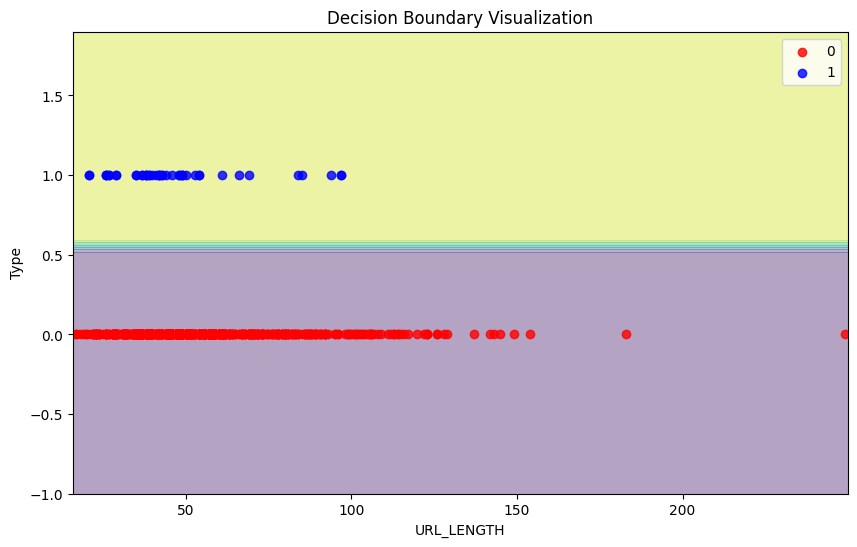

quality metrics:
Confusion Matrix - Train:
 [[642   0]
 [  0  44]]
Confusion Matrix - Test:
 [[161   0]
 [  0  11]]
Precision - Train: 1.0
Precision - Test: 1.0
Recall - Train: 1.0
Recall - Test: 1.0
F1 Score - Train: 1.0
F1 Score - Test: 1.0
AUC - Train: 1.0
AUC - Test: 1.0


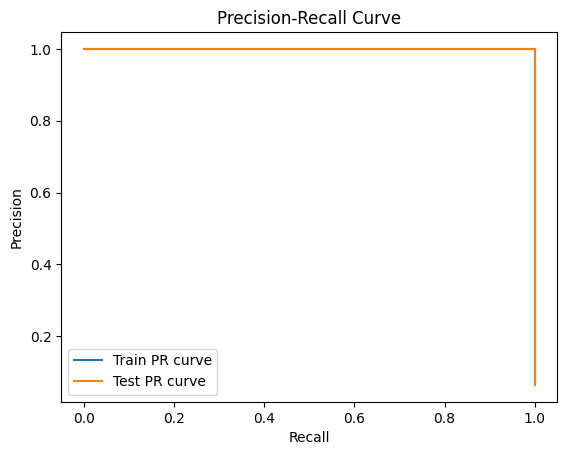

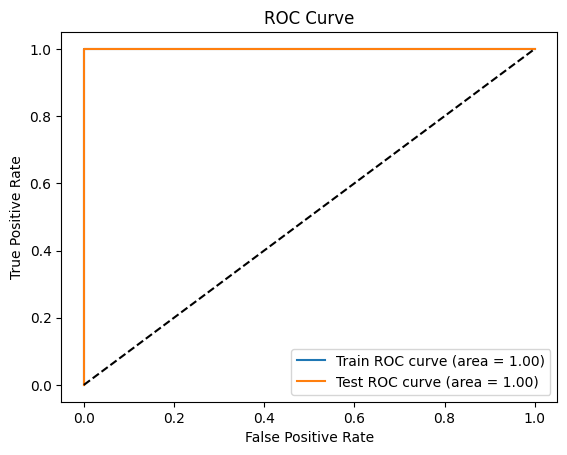

In [5]:
# Train the best model on the full training set
best_clf = DecisionTreeClassifier(**best_hyperparameters)
best_clf.fit(X_train, y_train)

# Evaluate the best model on the testing set
y_pred = best_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Best Model Hyperparameters:", best_hyperparameters)
print("Test Accuracy:", test_accuracy)
print("Train Accuracy:", best_accuracy)

# Predictions
train_predictions = best_clf.predict(X_train)
test_predictions = best_clf.predict(X_test)
print(f"Train Predictions: {train_predictions} \nTest Predictions: {test_predictions}")


plot_graph_(X_train, y_train, best_hyperparameters, "URL_LENGTH", "Type")
print("quality metrics:")
plot_graph_on_quality_metrics(y_train,y_test,train_predictions,test_predictions)